# Graphics and Visualization in Python

Python has a bewildering number of graphics libraries, catering to different needs. If you want a better understanding of the Python visualization landscape, see the following series of blog posts:

- [Python Data Visualization 2018: Why So Many Libraries?](https://www.anaconda.com/blog/developer-blog/python-data-visualization-2018-why-so-many-libraries/)
- [Python Data Visualization 2018: Moving Toward Convergence](https://www.anaconda.com/blog/developer-blog/python-data-visualization-moving-toward-convergence/)
- [Python Data Visualization 2018: Where Do We Go From Here?](https://www.anaconda.com/blog/developer-blog/python-data-visualization-2018-where-do-we-go-from-here/)

However for simple statistical plots, the `matplotlib` and `seaborn` libraries suffice most of the time:

- [Matplotlib tutorial](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)
- [Matplotlib gallery](http://matplotlib.org/1.2.1/gallery.html)
- [Seaborn gallery](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html#example-gallery)

As you have seen, `pandas` also has useful plotting functionality.

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rng
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Matplotlib

Matplotlib has a "functional" interface similar to Matlab via the `pyplot` module for simple interactive use, as well as an object-oriented interface that is useful for more complex graphic creations.

### Types of plots

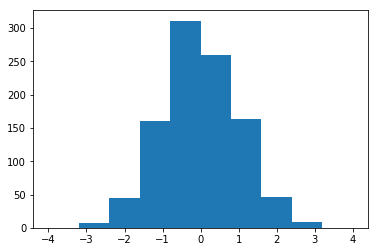

In [3]:
plt.hist(np.random.randn(1000), bins=np.linspace(-4,4,11))
pass

In [4]:
xs = [np.random.normal(mu, 0.5, (100)) for mu in range(5)]

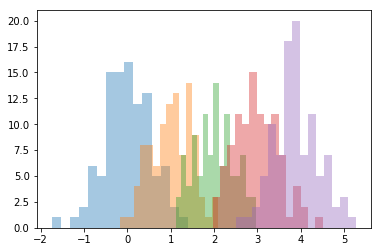

In [5]:
for x in xs:
    plt.hist(x, bins=15, alpha=0.4)

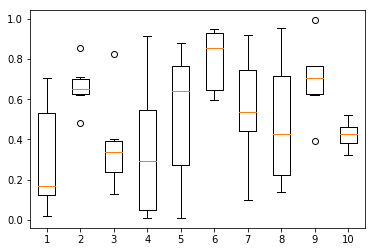

In [6]:
plt.boxplot(np.random.random((6,10)))
pass

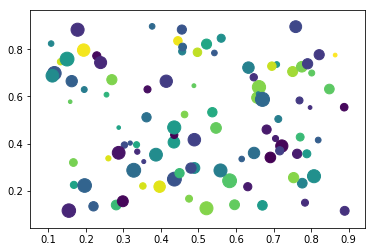

In [7]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100))
pass

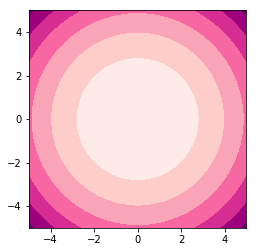

In [8]:
x = y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
plt.contourf(X, Y, Z, cmap=plt.cm.RdPu)
plt.axis('square')
pass

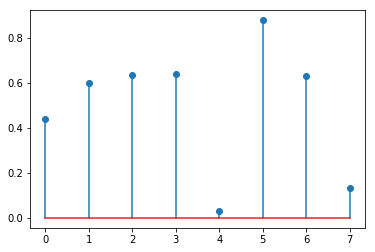

In [9]:
plt.stem(np.random.random(8))
plt.margins(0.05)
pass

In [10]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

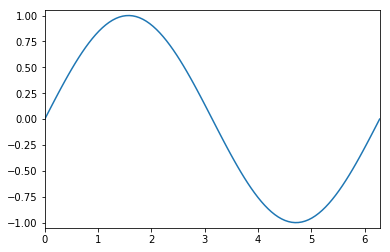

In [11]:
plt.plot(x, y)
plt.axis([0, 2*np.pi, -1.05, 1.05,])
pass

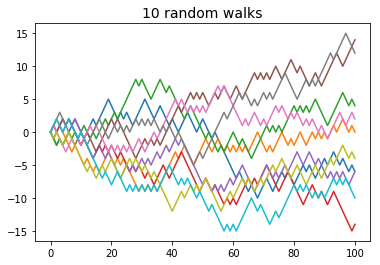

In [12]:
xs = np.c_[np.zeros(10), np.random.choice([-1,1], (10, 100)).cumsum(axis=1)]
plt.plot(xs.T)
plt.title('10 random walks', fontsize=14)
pass

### Displaying arrays

In [13]:
x = np.random.random((80, 80, 3))

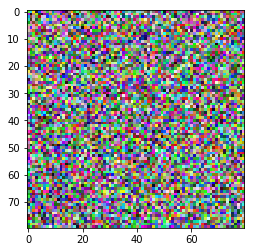

In [14]:
plt.imshow(x)
pass

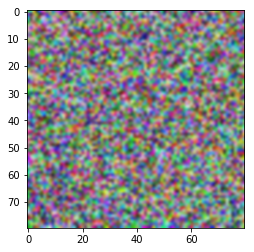

In [15]:
plt.imshow(x, interpolation='bicubic')
pass

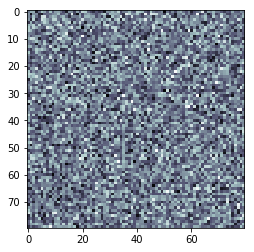

In [16]:
plt.imshow(x.mean(axis=-1), cmap='bone')
pass

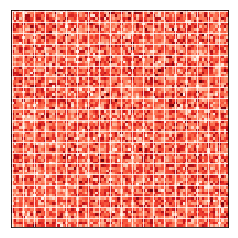

In [17]:
plt.imshow(x.mean(axis=-1), cmap='Reds')
plt.xticks(range(0, x.shape[1], 4))
plt.yticks(range(0, x.shape[0], 4))
plt.grid(color='white')
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
pass

### Colors

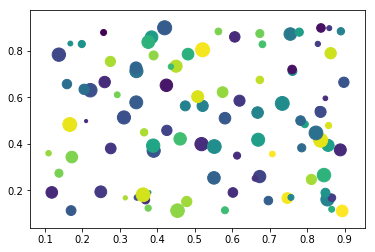

In [18]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100))
pass

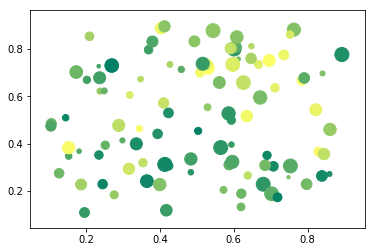

In [19]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100), cmap='summer')
pass

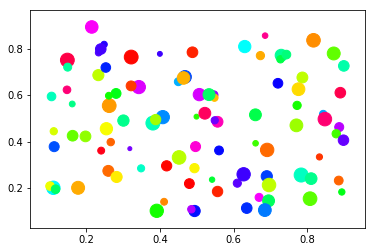

In [20]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100), cmap='hsv')
pass

#### Getting a list of colors from a colormap

Giving an argument of 0.0 < x < 1.0 to a `colormap` gives the appropriate interpolated color.

In [21]:
# find the bottom, middle and top colors of the winter colormap
colors = plt.cm.winter(np.linspace(0, 1, 3))
colors

array([[0.        , 0.        , 1.        , 1.        ],
       [0.        , 0.50196078, 0.74901961, 1.        ],
       [0.        , 1.        , 0.5       , 1.        ]])

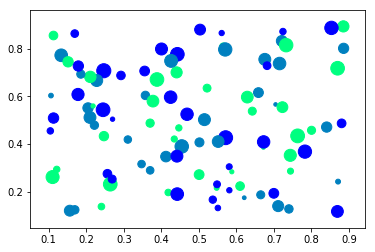

In [22]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=colors)
pass

### Styles

In [23]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [25]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

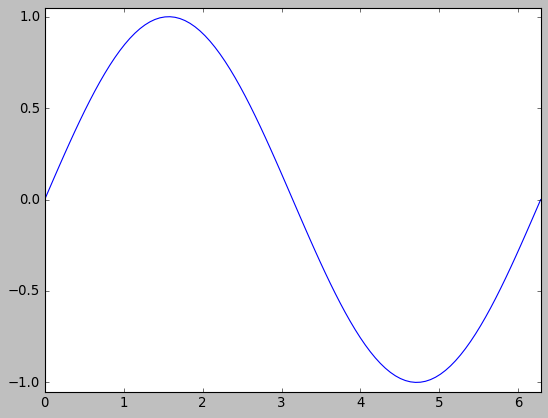

In [26]:
with plt.style.context('classic'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

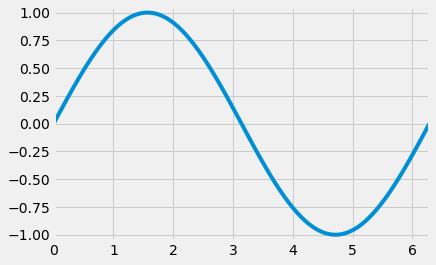

In [27]:
with plt.style.context('fivethirtyeight'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

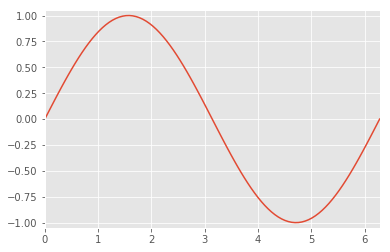

In [28]:
with plt.style.context('ggplot'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

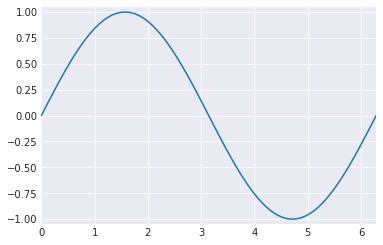

In [29]:
with plt.style.context('seaborn-darkgrid'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

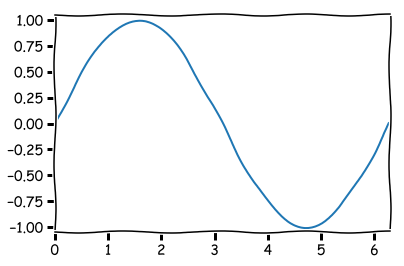

In [30]:
with plt.xkcd():
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

### Creating your own style

Many, many options can be configured.

In [31]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter

In [32]:
%%file foo.mplstyle
axes.grid: True
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16

Overwriting foo.mplstyle


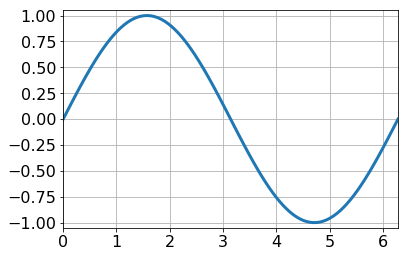

In [33]:
with plt.style.context('foo.mplstyle'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

### Customizing plots

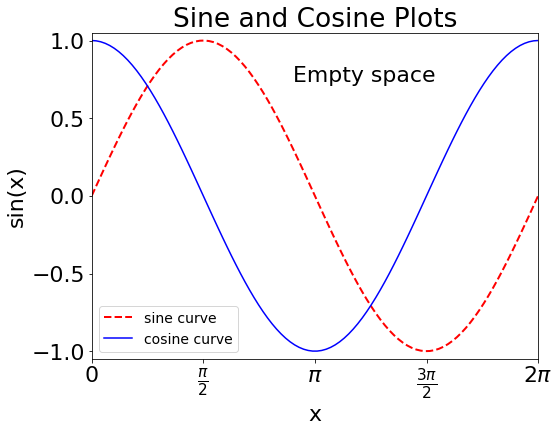

In [34]:
plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
plt.plot(x, y, color='red', linewidth=2, linestyle='dashed', label='sine curve')
plt.plot(x, np.cos(x), 'b-', label='cosine curve')
plt.legend(loc='best', fontsize=14)
plt.axis([0, 2*np.pi, -1.05, 1.05,])
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.xticks([0,0.5*np.pi,np.pi,1.5*np.pi,2*np.pi], 
           [0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.title('Sine and Cosine Plots')
plt.text(0.45, 0.9, 'Empty space', transform=ax.transAxes, ha='left', va='top')
pass

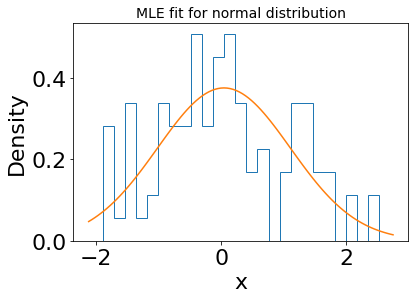

In [35]:
x = np.random.randn(100)
plt.hist(x, bins=25, histtype='step', normed=True)
mu, sigma = stats.norm.fit(x)
xp = np.linspace(*plt.xlim(), 100)
plt.plot(xp, stats.norm(mu, sigma).pdf(xp))
plt.xlabel('x')
plt.ylabel('Density')
plt.title('MLE fit for normal distribution', fontsize=14)
pass

### Layouts

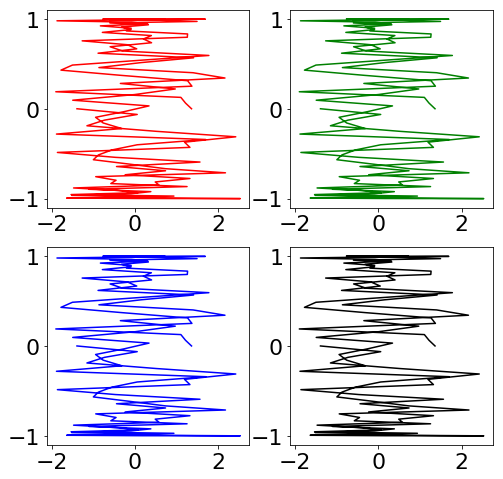

In [36]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
axes[0,0].plot(x,y, 'r')
axes[0,1].plot(x,y, 'g')
axes[1,0].plot(x,y, 'b')
axes[1,1].plot(x,y, 'k')
for ax in axes.ravel():
    ax.margins(0.05)
pass

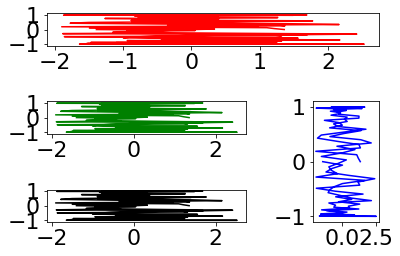

In [37]:
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0), colspan=2)
axes = [ax1, ax2, ax3, ax4]
colors = ['r', 'g', 'b', 'k']
for ax, c in zip(axes, colors):
    ax.plot(x, y, c)
    ax.margins(0.05)
plt.tight_layout()

## Seaborn

In [38]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

### Density plots

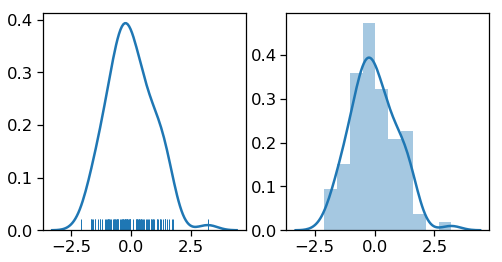

In [39]:
xs = rng.normal(0,1,100)

fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(xs, hist=False, rug=True, ax=axes[0]);
sns.distplot(xs, hist=True, ax=axes[1])
pass

### Kernel density estimate

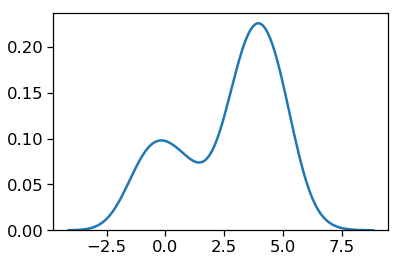

In [40]:
sns.kdeplot(np.r_[rng.normal(0,1,50), rng.normal(4,0.8,100)])
pass

In [41]:
iris = sns.load_dataset('iris')

In [42]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Joint distribution plot

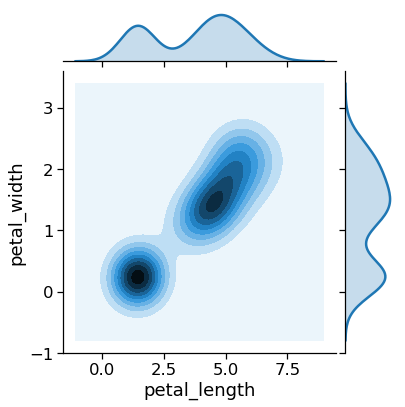

In [43]:
sns.jointplot(x='petal_length', y='petal_width', data=iris, kind='kdeplot')
pass

### Box and violin plots

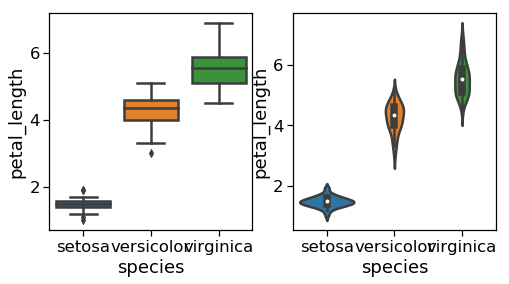

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

sns.boxplot(x='species', y='petal_length', data=iris, ax=axes[0])
sns.violinplot(x='species', y='petal_length', data=iris, ax=axes[1])
pass

### Composite plots

In [45]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)

In [46]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


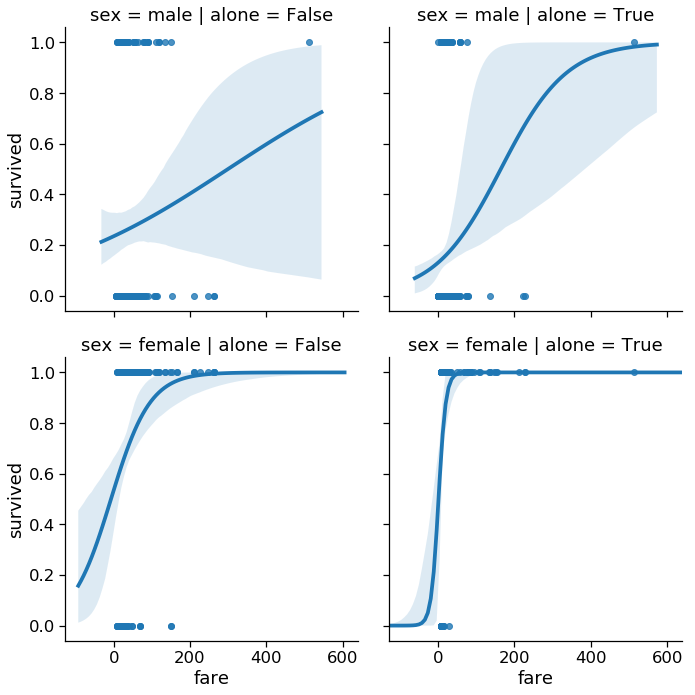

In [47]:
sns.lmplot(x='fare', y='survived', col='alone', row='sex', data=titanic, logistic=True)
pass

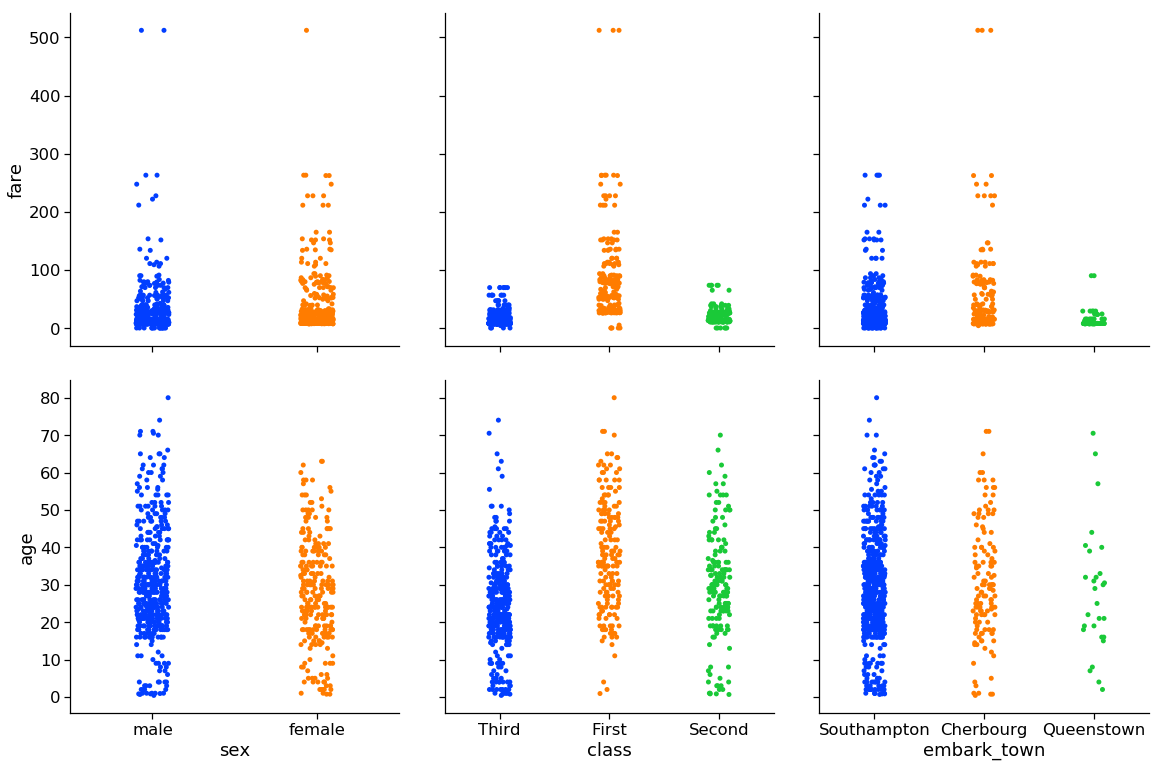

In [48]:
g = sns.PairGrid(titanic,
                 y_vars=['fare', 'age'],
                 x_vars=['sex', 'class', 'embark_town' ],
                 aspect=1, size=5.5)
g.map(sns.stripplot, jitter=True, palette="bright")
pass

### Seaborn styles

In [49]:
sns.set_style('ticks')

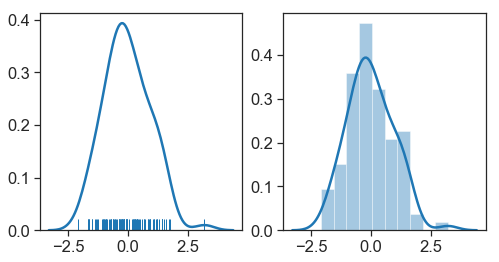

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(xs, hist=False, rug=True, ax=axes[0]);
sns.distplot(xs, hist=True, ax=axes[1])
pass

In [51]:
sns.set_style('dark')

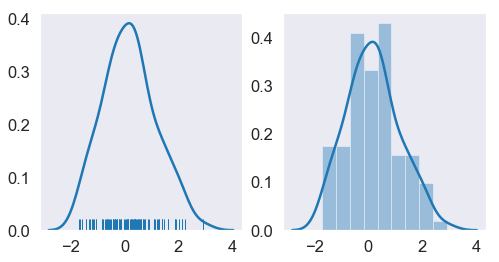

In [52]:
xs = rng.normal(0,1,100)

fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(xs, hist=False, rug=True, ax=axes[0]);
sns.distplot(xs, hist=True, ax=axes[1])
pass

In [53]:
sns.set_style('darkgrid')

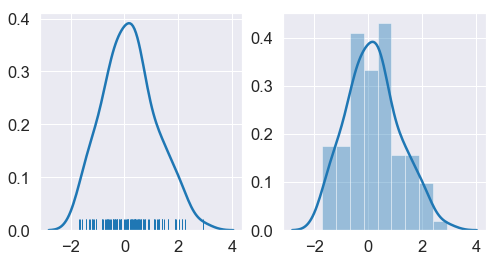

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(xs, hist=False, rug=True, ax=axes[0]);
sns.distplot(xs, hist=True, ax=axes[1])
pass